In [34]:
import seaborn as sn
import numpy as np
import pandas as pd
import statistics as st
import random as rd
import matplotlib.pyplot as plt
import sklearn as sk

In [35]:
np.random.seed(42)
data=pd.read_csv('D:\\R_Drive\\UMKC\\Subjects\\Fall_Semester\\Priciples_of_Datascience\\Assignments\\Assignment 3\\Clean_data\\data_clean.csv')

In [36]:
sample_population=data.sample(n= 25, random_state= 40)

In [37]:
sample_population.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
370,370,3,173,82,48,465,38.4,2.137,25,1
388,388,5,144,82,26,285,32.0,0.452,58,1
611,611,3,174,58,22,194,32.9,0.593,36,1
550,550,1,116,70,28,0,27.4,0.204,21,0
232,232,1,79,80,25,37,25.4,0.583,22,0


In [38]:
glucose_mean=st.mean(sample_population.loc[:,"Glucose"])
print(glucose_mean)

121.2


In [39]:
glucose_max=max(sample_population.loc[:,"Glucose"])
print(glucose_max)

184


In [40]:
population_mean=st.mean(data.loc[:,"Glucose"])
print(population_mean)

120.89453125


In [41]:
population_max=max(data.loc[:,"Glucose"])
print(population_max)

199


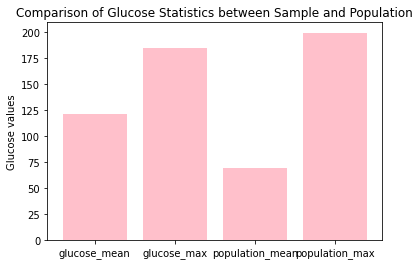

In [57]:
plt.bar(['glucose_mean', 'glucose_max', 'population_mean', 'population_max'],
        [glucose_mean,glucose_max, population_mean, population_max],color='pink')
plt.ylabel('Glucose values')
plt.title('Comparison of Glucose Statistics between Sample and Population')
plt.show()

### b) Find the 98th percentile of BMI of your sample and the population and compare the results using charts. 

In [43]:
df=pd.DataFrame(data)

In [44]:
sample_percentile=np.percentile(sample_population['BMI'],98)
population_percentile=np.percentile(df['BMI'],98)

In [45]:
print(f"98th Percentile BMI for Sample: {sample_percentile}")
print(f"98th Percentile BMI for Population: {population_percentile}")

98th Percentile BMI for Sample: 47.151999999999994
98th Percentile BMI for Population: 47.52599999999996


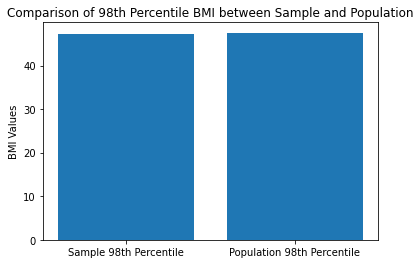

In [46]:
plt.bar(['Sample 98th Percentile', 'Population 98th Percentile'],
        [sample_percentile, population_percentile])

plt.ylabel('BMI Values')
plt.title('Comparison of 98th Percentile BMI between Sample and Population')
plt.show()

### C) Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the population and find the average mean, standard deviation and percentile for BloodPressure and compare this with these statistics from the population for the same variable. Again, you should create charts for this comparison. Report on your findings.  (10 points)  

In [47]:
np.random.seed(42)

In [48]:
num_samples = 500
sample_size = 150

In [49]:
bootstrap_means = np.zeros(num_samples)
bootstrap_stds = np.zeros(num_samples)
bootstrap_percentiles = np.zeros(num_samples)

In [50]:
for i in range(num_samples):
    bootstrap_sample = np.random.choice(df['BloodPressure'], size=sample_size, replace=True)
    bootstrap_means[i] = np.mean(bootstrap_sample)
    bootstrap_stds[i] = np.std(bootstrap_sample)
    bootstrap_percentiles[i] = np.percentile(bootstrap_sample,95)

In [51]:
population_mean = np.mean(df['BloodPressure'])
population_std = np.std(df['BloodPressure'])
population_percentile = np.percentile(df['BloodPressure'], 95)

In [52]:
print(f"Population Mean BloodPressure: {population_mean}")
print(f"Population Standard Deviation BloodPressure: {population_std}")
print(f"Population 95th Percentile BloodPressure: {population_percentile}")

Population Mean BloodPressure: 69.10546875
Population Standard Deviation BloodPressure: 19.343201628981696
Population 95th Percentile BloodPressure: 90.0


Text(0.5, 1.0, 'Bootstrap Means vs Population Mean')

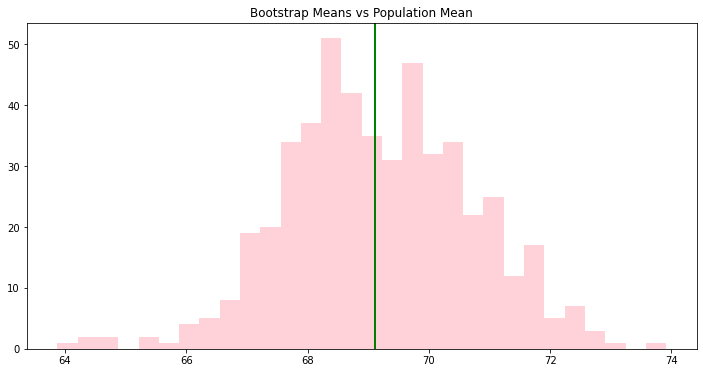

In [53]:
plt.figure(figsize=(12, 6))

plt.hist(bootstrap_means, bins=30, color='pink', alpha=0.7)
plt.axvline(population_mean, color='green', linewidth=2)
plt.title('Bootstrap Means vs Population Mean')


Text(0.5, 1.0, 'Bootstrap Standard Deviations vs Population Standard Deviation')

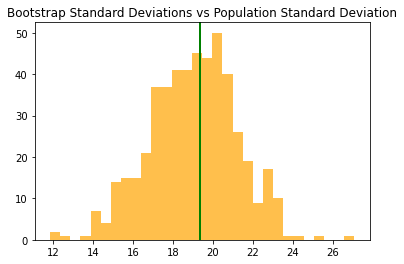

In [54]:

plt.hist(bootstrap_stds, bins=30, color='orange', alpha=0.7)
plt.axvline(population_std, color='green', linewidth=2)
plt.title('Bootstrap Standard Deviations vs Population Standard Deviation')

Text(0.5, 1.0, 'Bootstrap 95th Percentiles vs Population 95th Percentile')

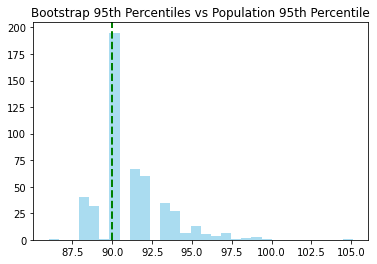

In [56]:

plt.hist(bootstrap_percentiles, bins=30, color='skyblue', alpha=0.7)
plt.axvline(population_percentile, color='green', linestyle='dashed', linewidth=2)
plt.title('Bootstrap 95th Percentiles vs Population 95th Percentile')